# Cascade

learning layers of abstractions :) 

#### initialise nb

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from eden.util import configure_logging
import logging

configure_logging(logging.getLogger(),verbosity=0)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')

# data source, see introduction for details.
from eden_extra.converter.graph.gspan import gspan_to_eden
from itertools import islice

def get_graphs(dataset_fname='../toolsdata/bursi.pos.gspan', size=100):
    return islice(gspan_to_eden(dataset_fname),size)

def get_graphss(dataset_fname='../toolsdata/bursi.neg.gspan', size=100):
    return islice(gspan_to_eden(dataset_fname),size)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


minortransform_fit


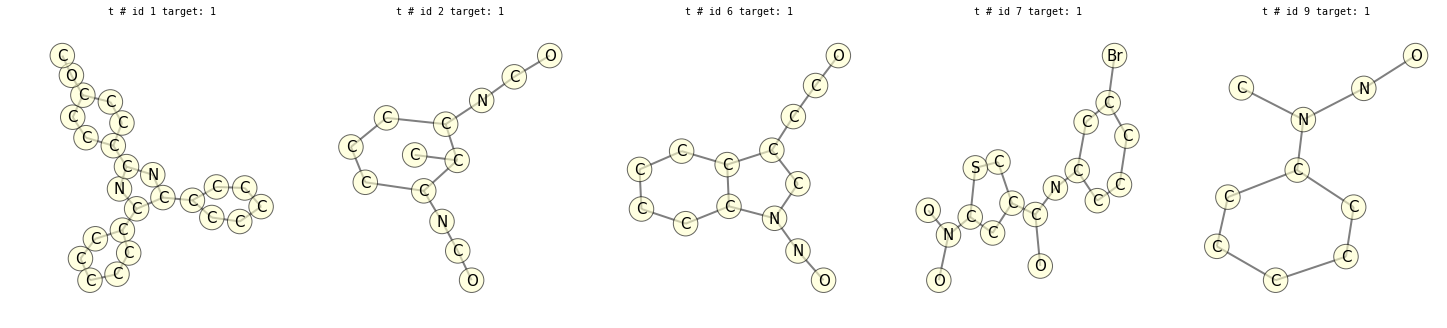

minortransform_scores


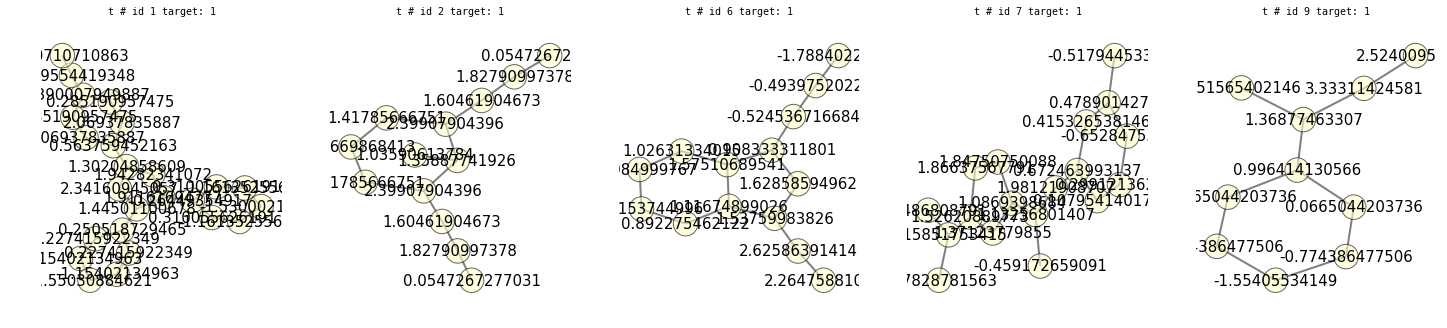

num clusters: 19
class: 0 count:5 (0.03)
class: 1 count:13 (0.09)
class: 2 count:2 (0.01)
class: 3 count:4 (0.03)
class: 4 count:6 (0.04)
class: 5 count:4 (0.03)
class: 6 count:2 (0.01)
class: 7 count:2 (0.01)
class: 8 count:2 (0.01)
class: 9 count:2 (0.01)
class: 10 count:6 (0.04)
class: 11 count:3 (0.02)
class: 12 count:6 (0.04)
class: 13 count:5 (0.03)
class: 14 count:2 (0.01)
class: 15 count:2 (0.01)
class: 16 count:2 (0.01)
class: 17 count:2 (0.01)
class: 18 count:2 (0.01)
class: 19 count:3 (0.02)
class: -1 count:74 (0.50)

cluster: 0  len 5


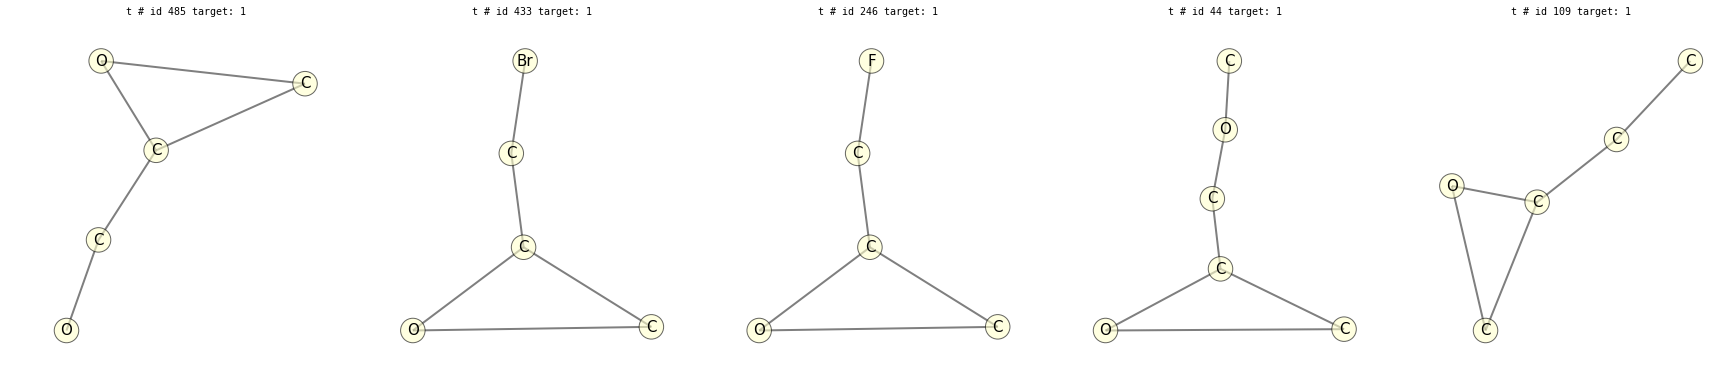

cluster: 1  len 13


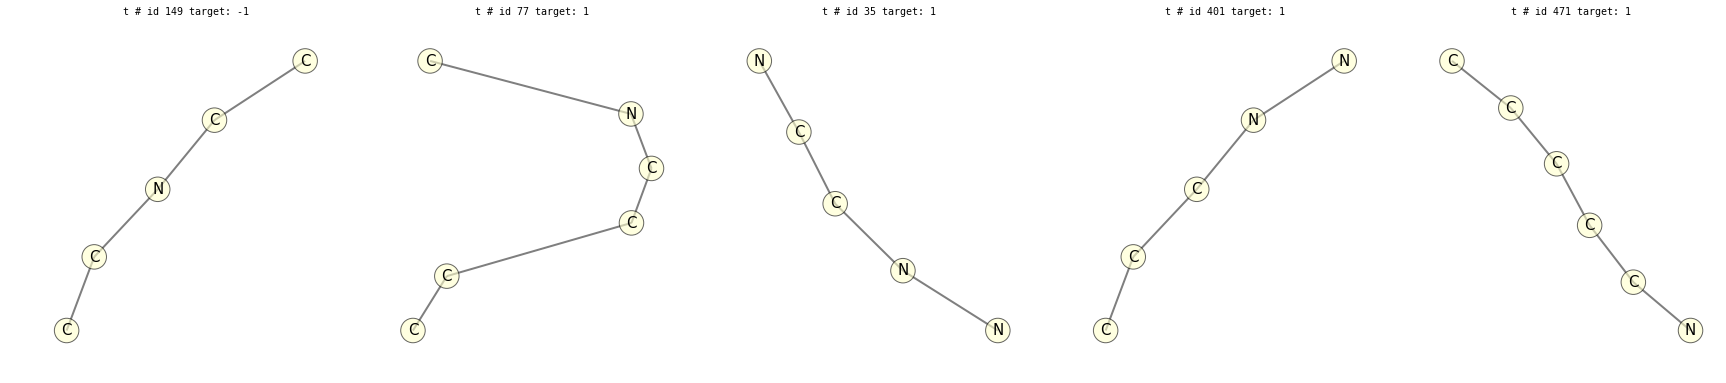

cluster: 2  len 2


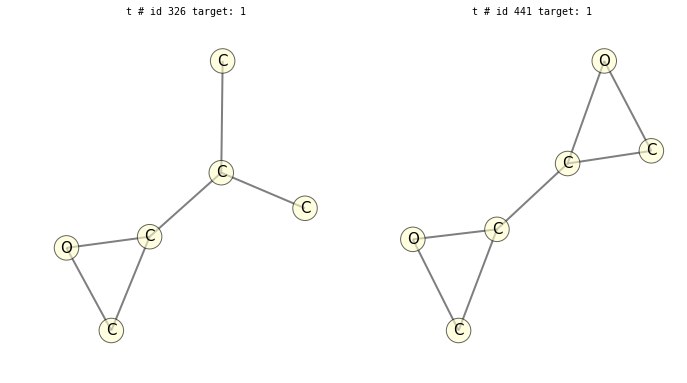

cluster: 3  len 4


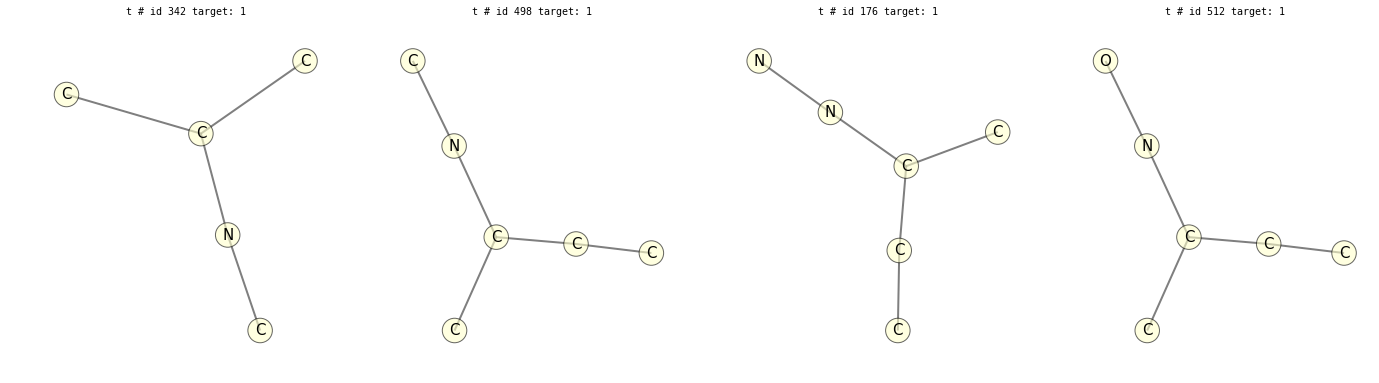

cluster: 4  len 6


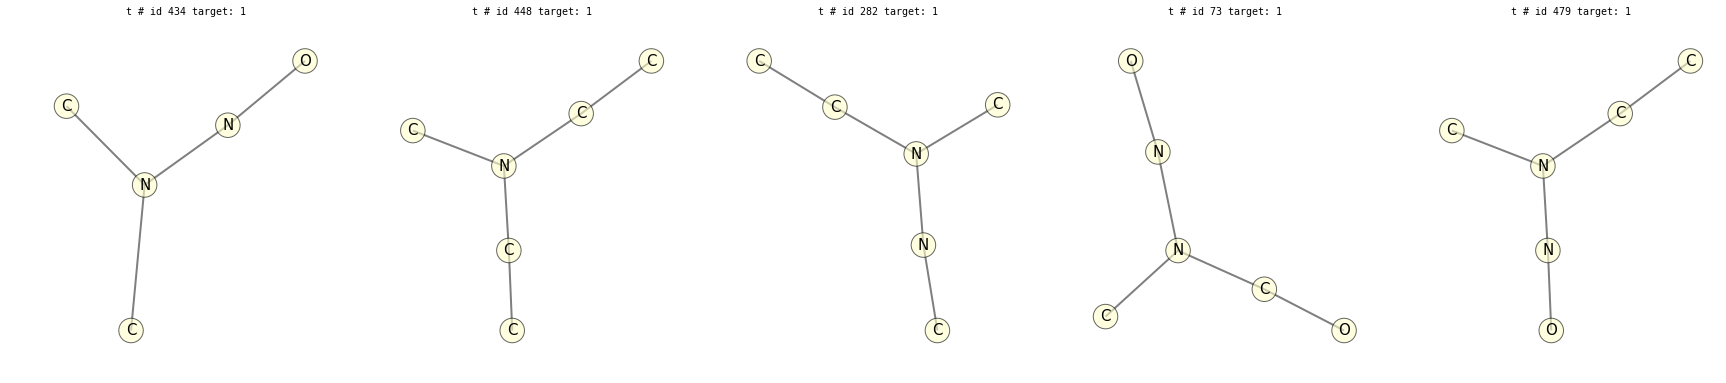

cluster: 5  len 4


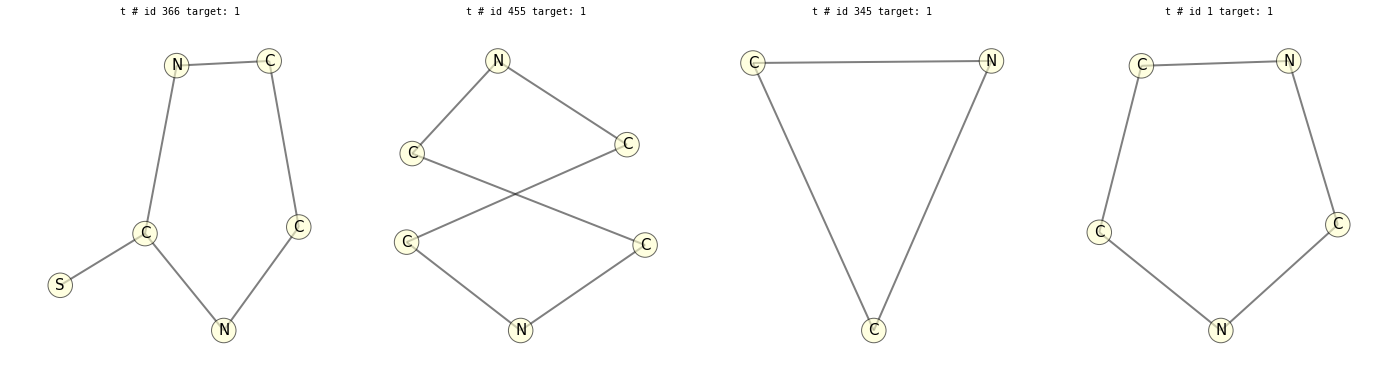

cluster: 6  len 2


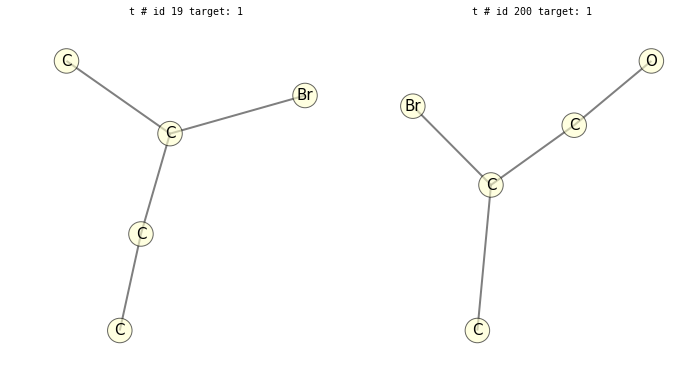

cluster: 7  len 2


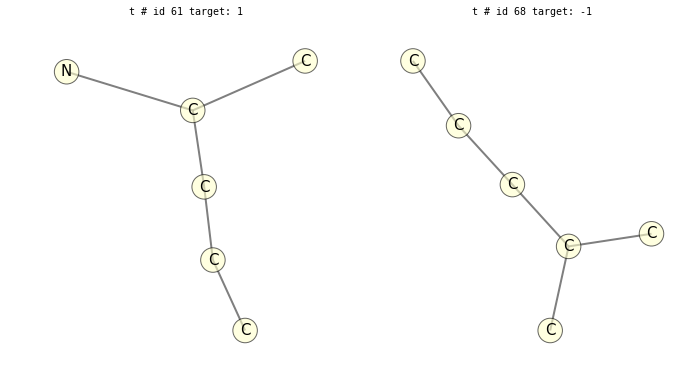

cluster: 8  len 2


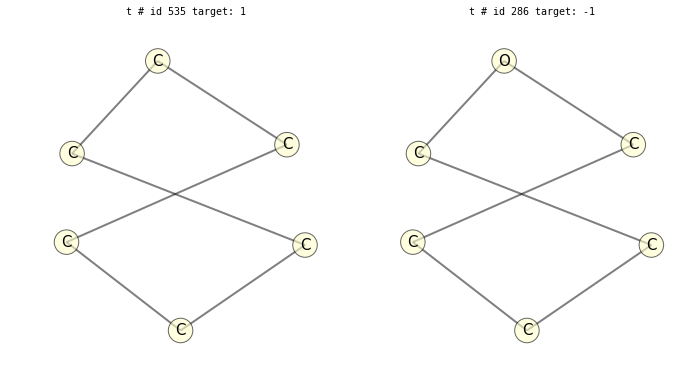

cluster: 9  len 2


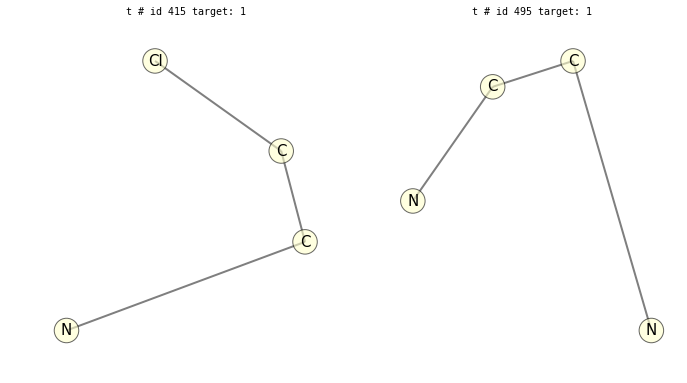

cluster: 10  len 6


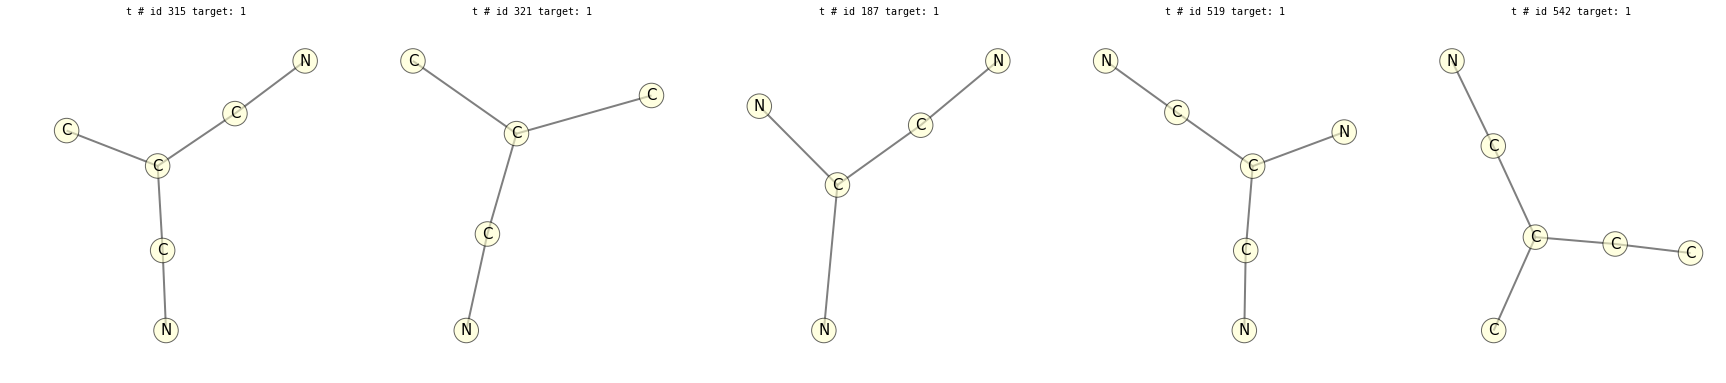

cluster: 11  len 3


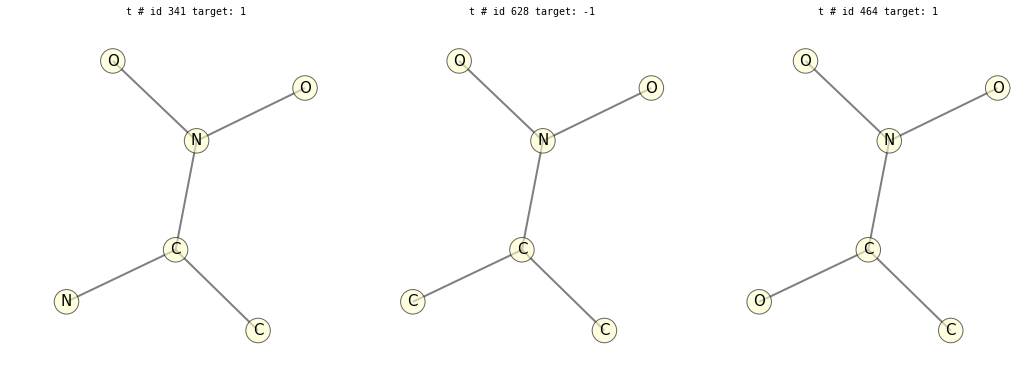

cluster: 12  len 6


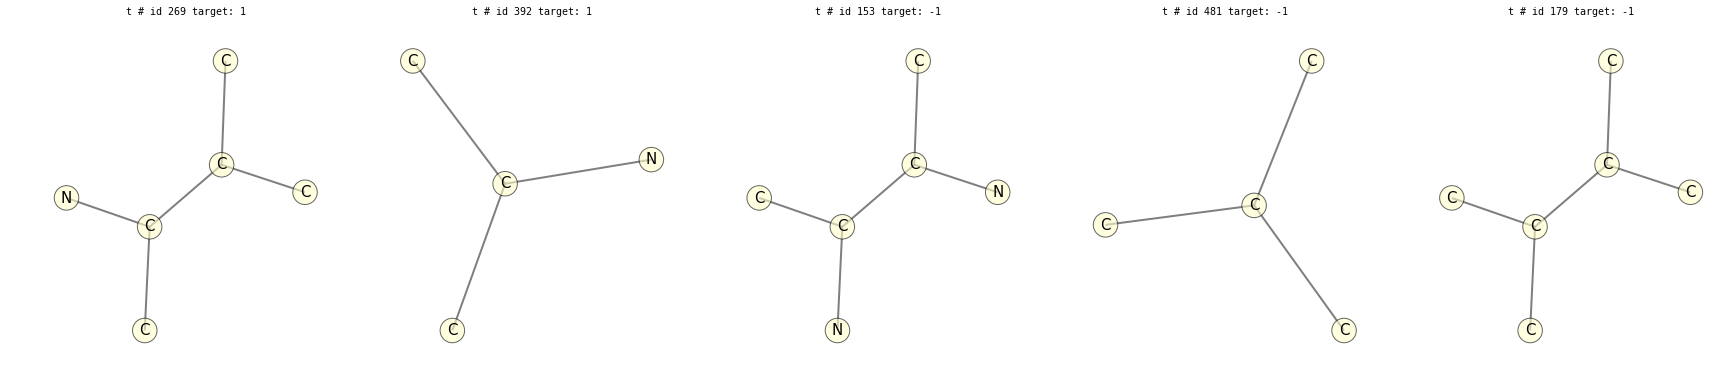

cluster: 13  len 5


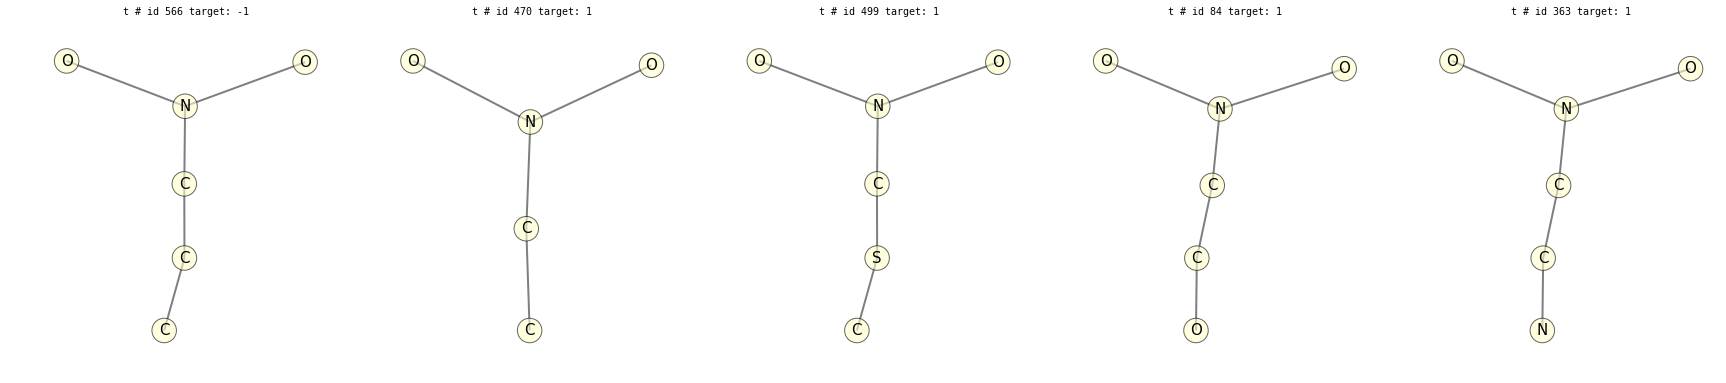

cluster: 14  len 2


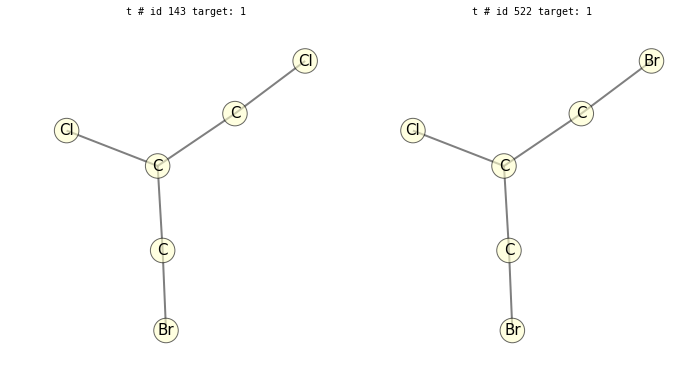

cluster: 15  len 2


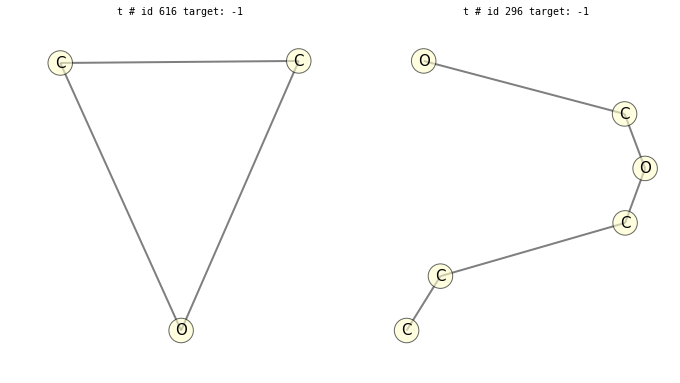

cluster: 16  len 2


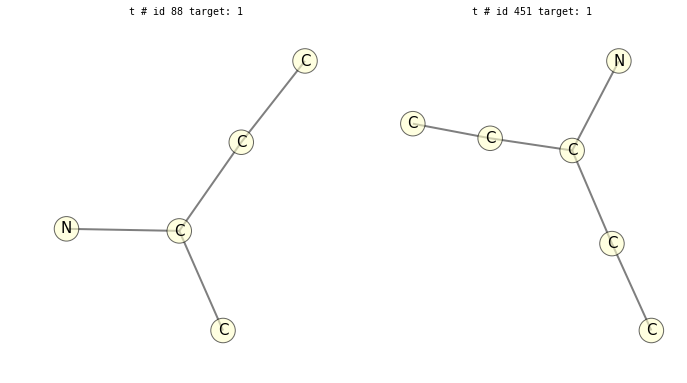

cluster: 17  len 2


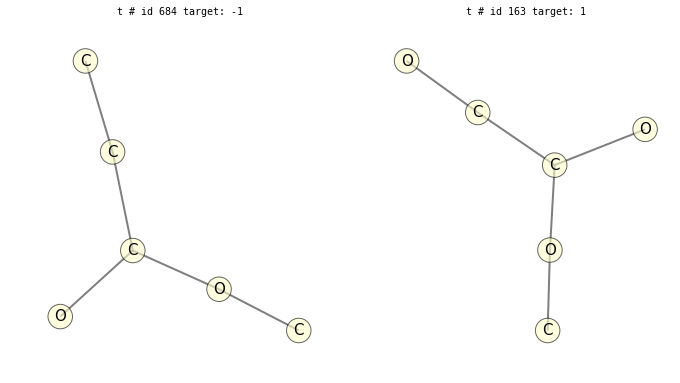

cluster: 18  len 2


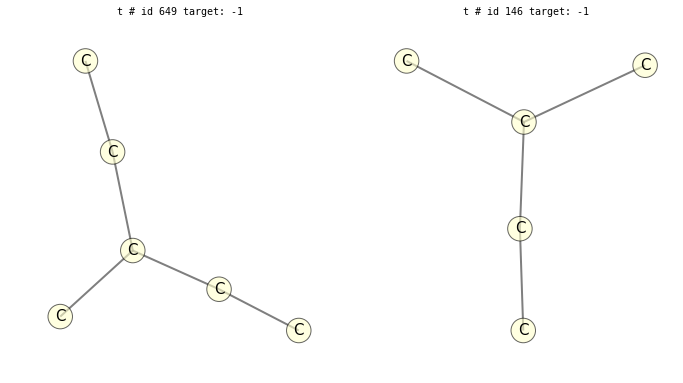

cluster: 19  len 3


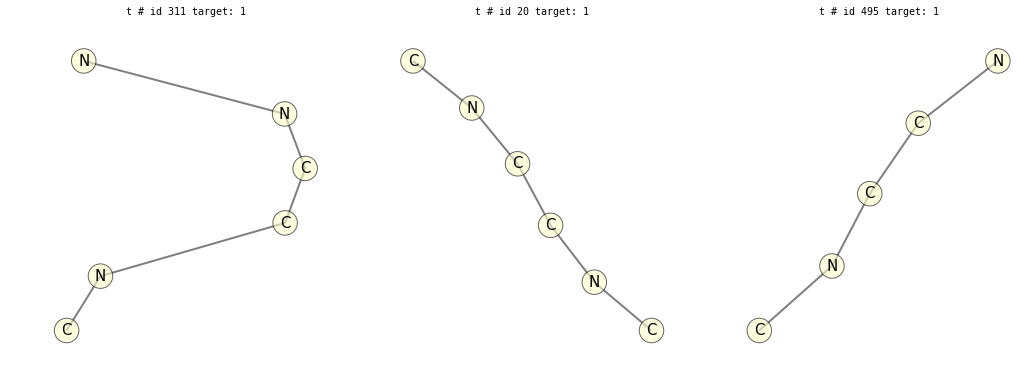

cluster: -1  len 74


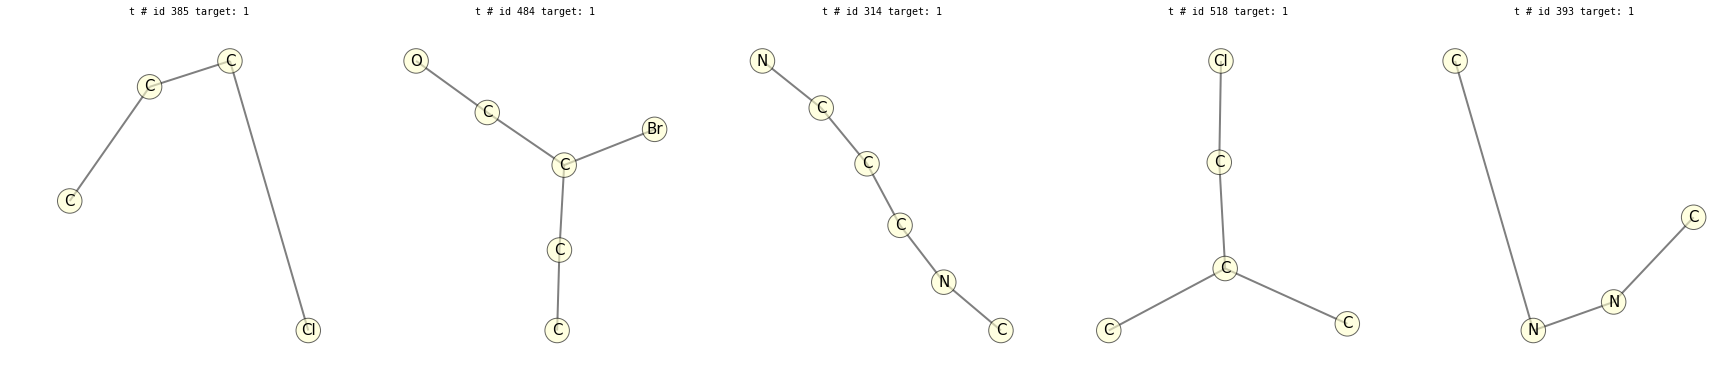

minortransform_fit


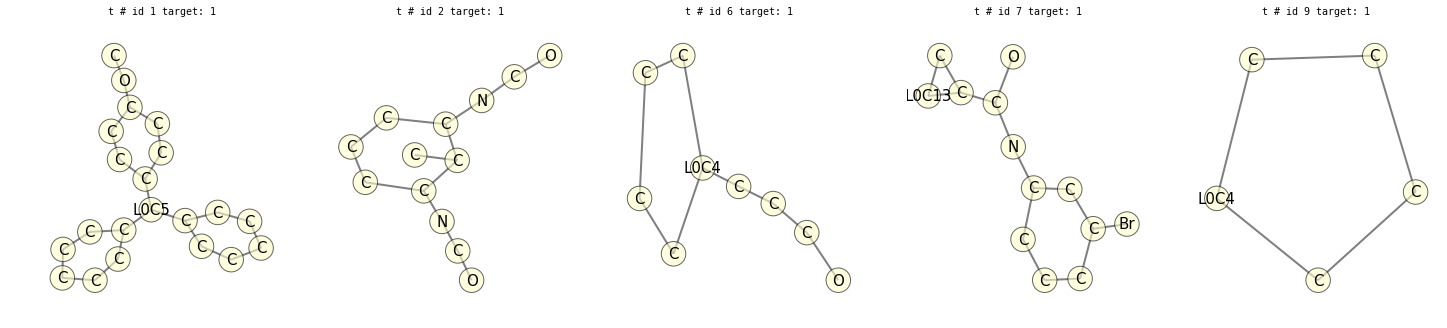

minortransform_scores


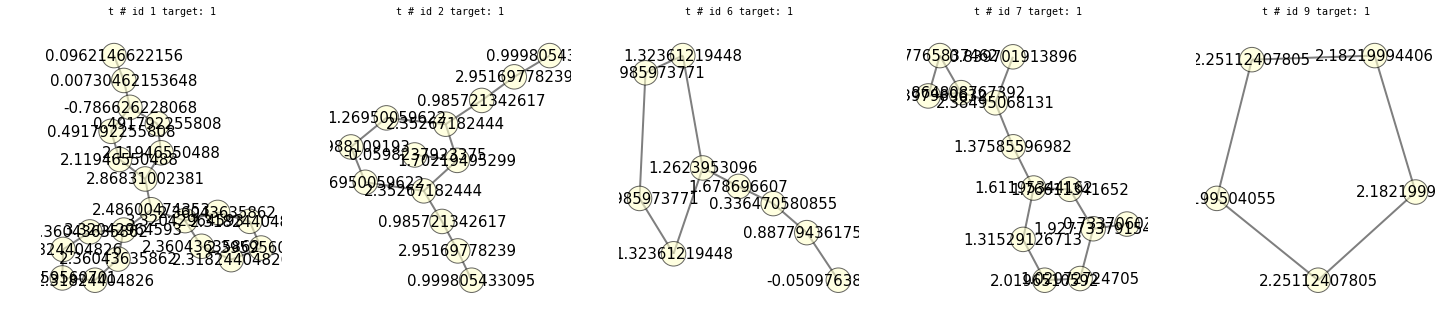

num clusters: 21
class: 0 count:2 (0.01)
class: 1 count:57 (0.21)
class: 2 count:2 (0.01)
class: 3 count:4 (0.02)
class: 4 count:10 (0.04)
class: 5 count:2 (0.01)
class: 6 count:4 (0.02)
class: 7 count:6 (0.02)
class: 8 count:10 (0.04)
class: 9 count:6 (0.02)
class: 10 count:2 (0.01)
class: 11 count:2 (0.01)
class: 12 count:6 (0.02)
class: 13 count:3 (0.01)
class: 14 count:3 (0.01)
class: 15 count:3 (0.01)
class: 16 count:2 (0.01)
class: 17 count:2 (0.01)
class: 18 count:2 (0.01)
class: 19 count:2 (0.01)
class: 20 count:2 (0.01)
class: 21 count:2 (0.01)
class: -1 count:132 (0.50)

cluster: 0  len 2


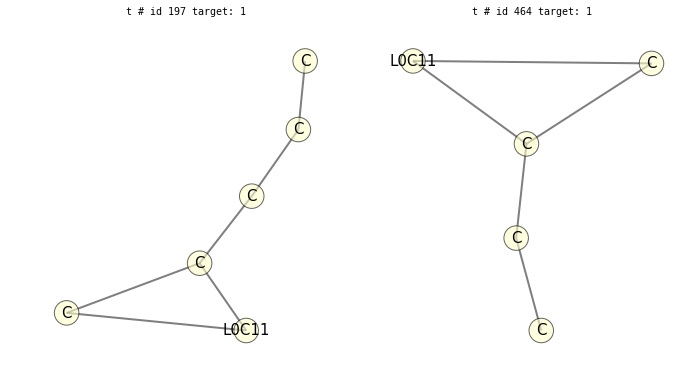

cluster: 1  len 57


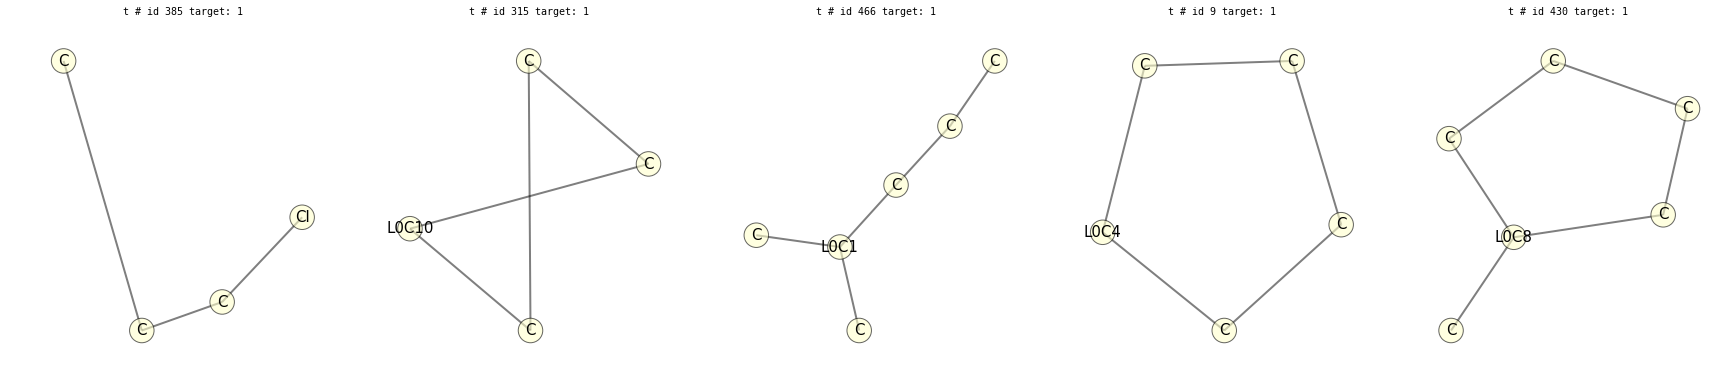

cluster: 2  len 2


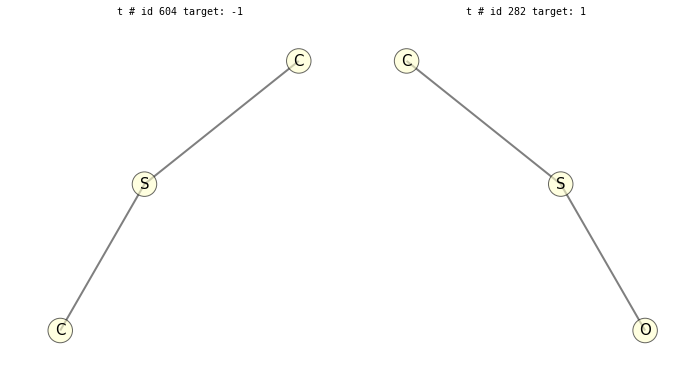

cluster: 3  len 4


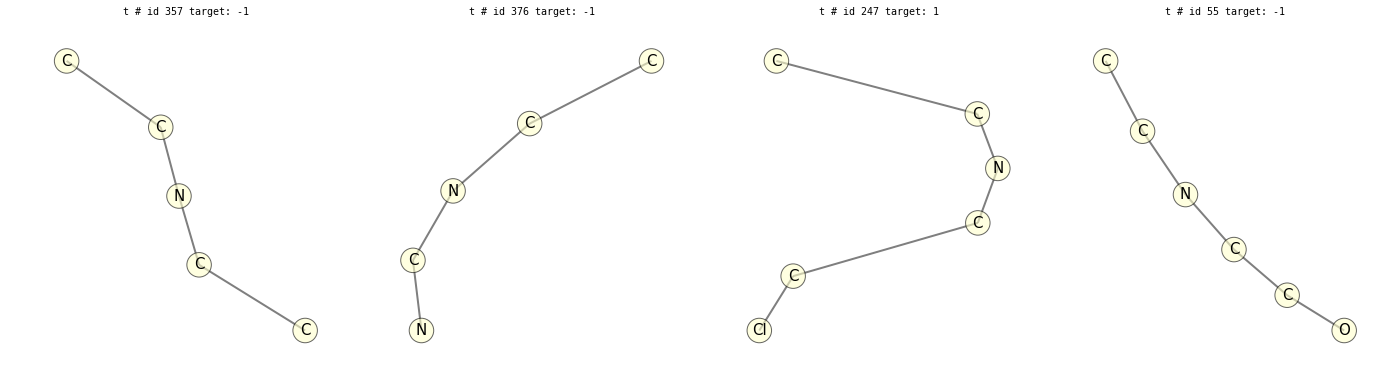

cluster: 4  len 10


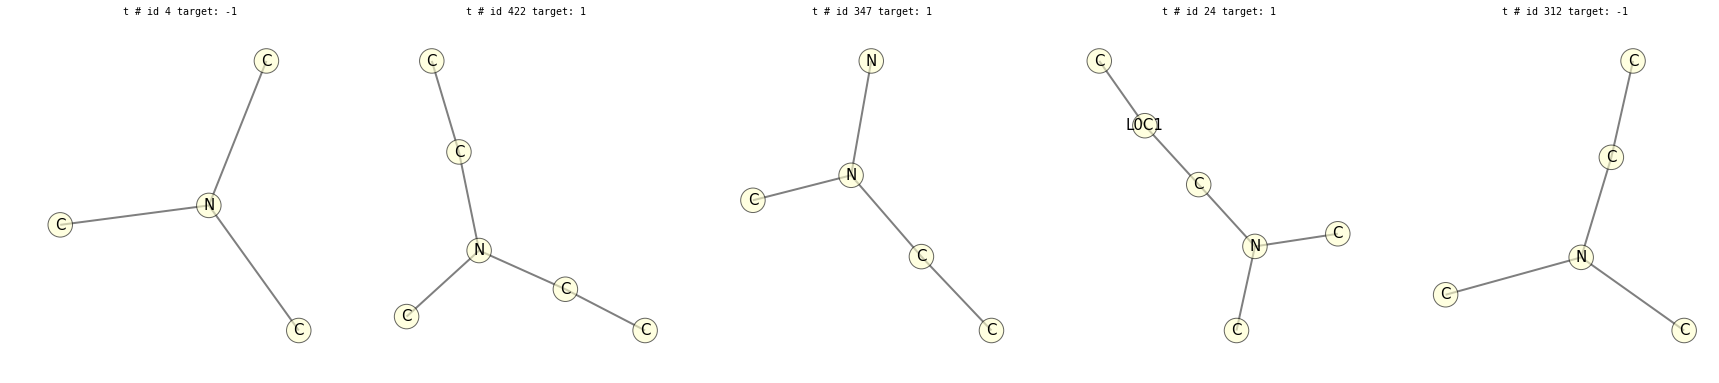

cluster: 5  len 2


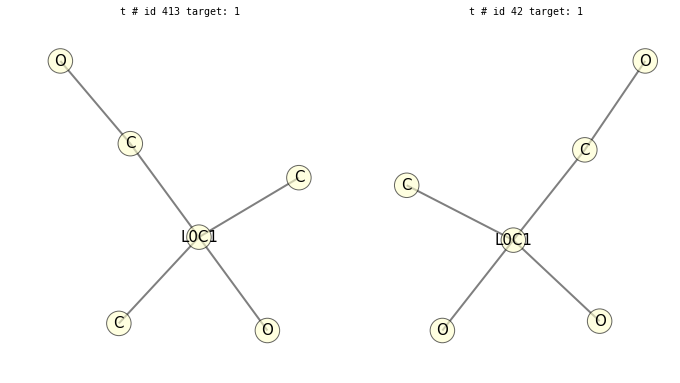

cluster: 6  len 4


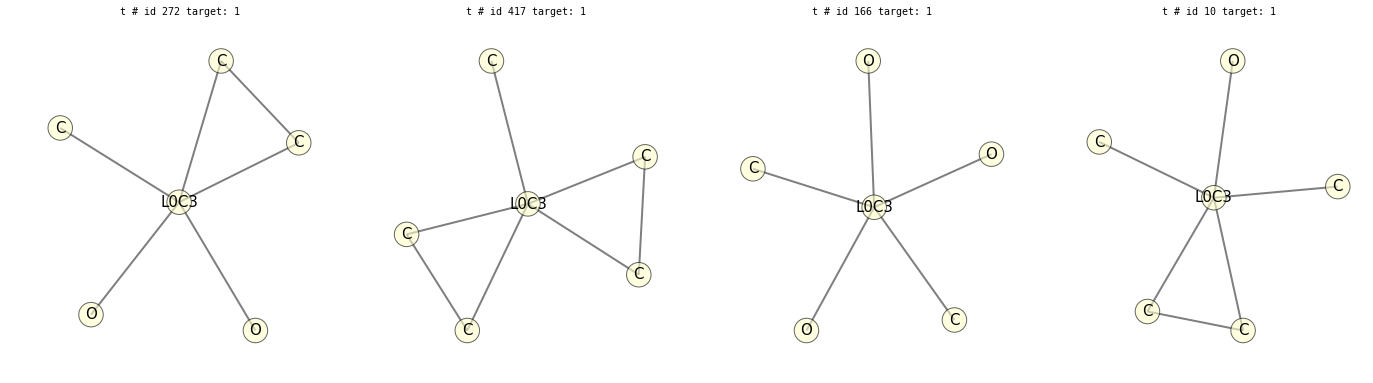

cluster: 7  len 6


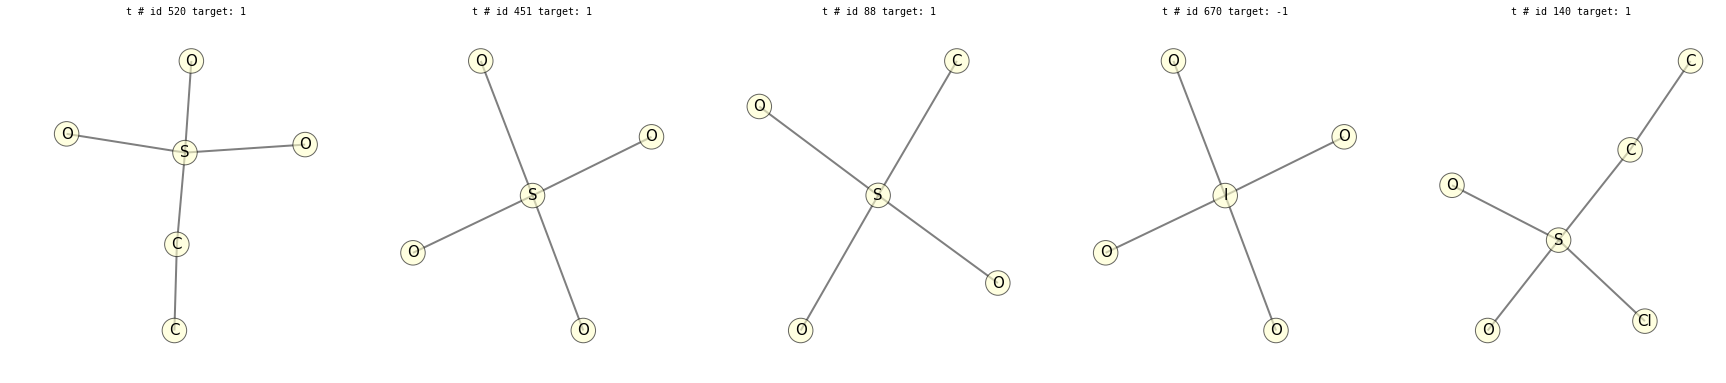

cluster: 8  len 10


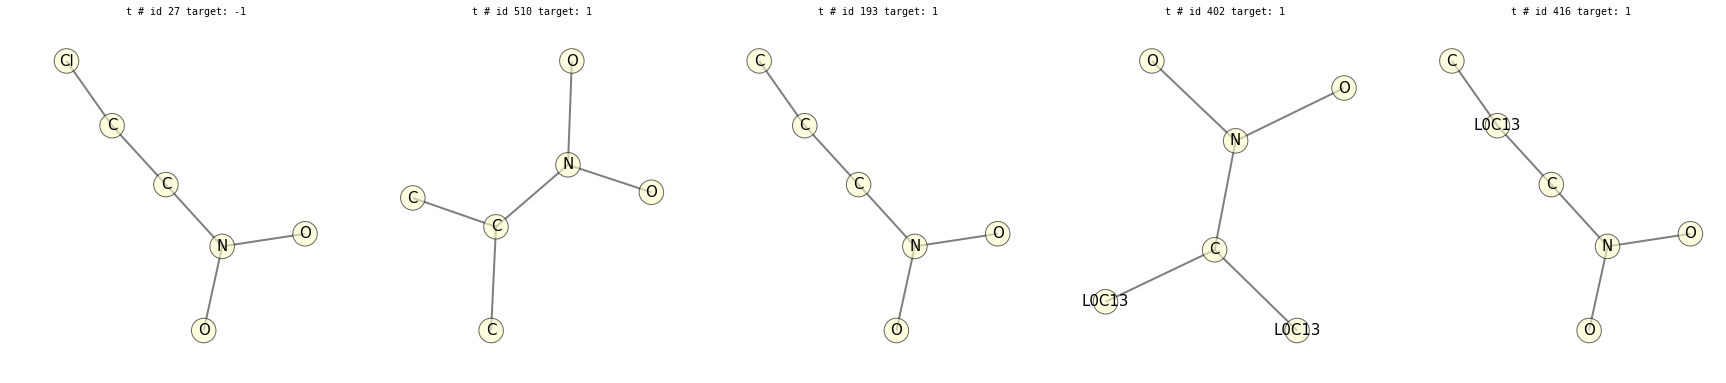

cluster: 9  len 6


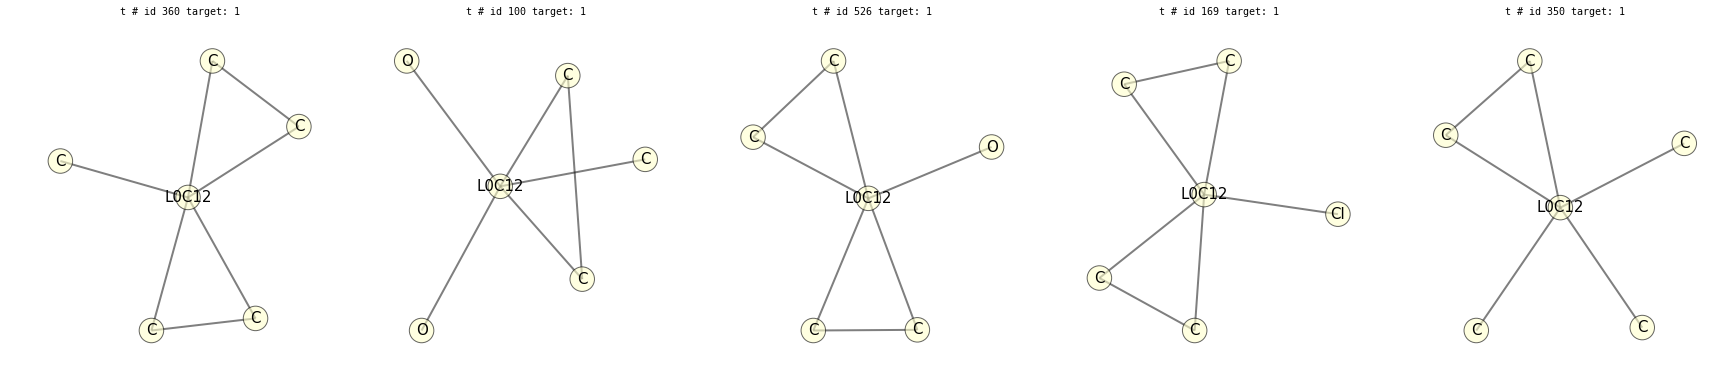

cluster: 10  len 2


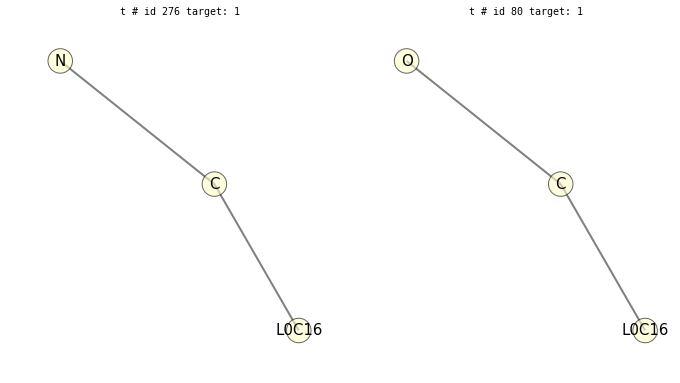

cluster: 11  len 2


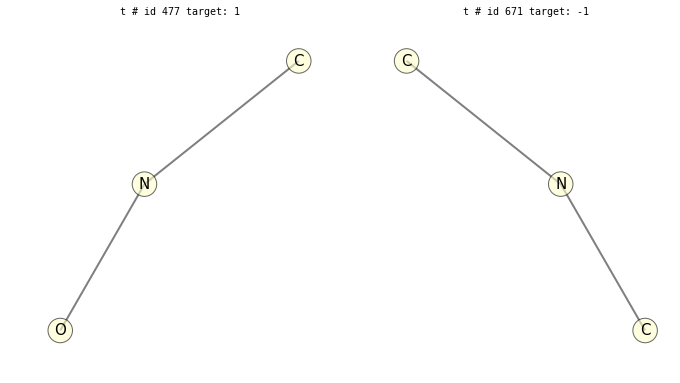

cluster: 12  len 6


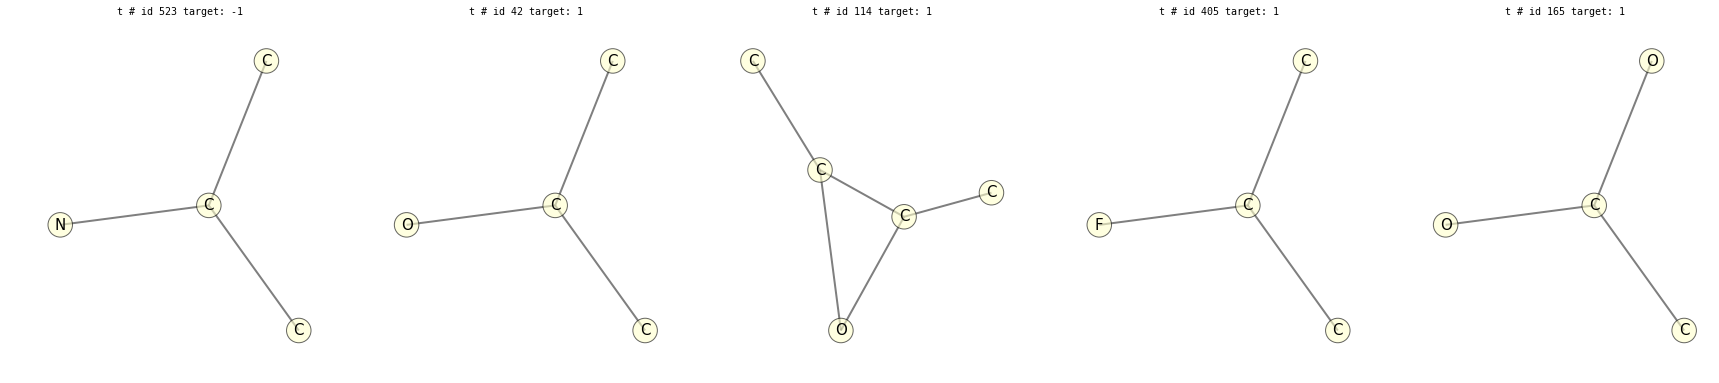

cluster: 13  len 3


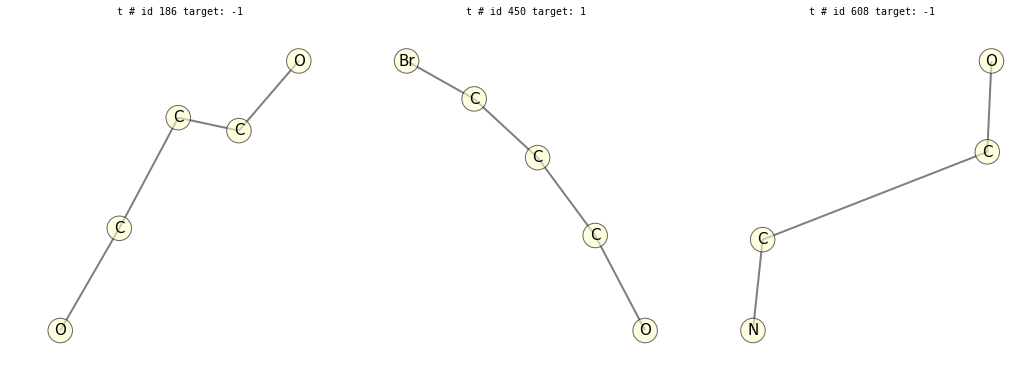

cluster: 14  len 3


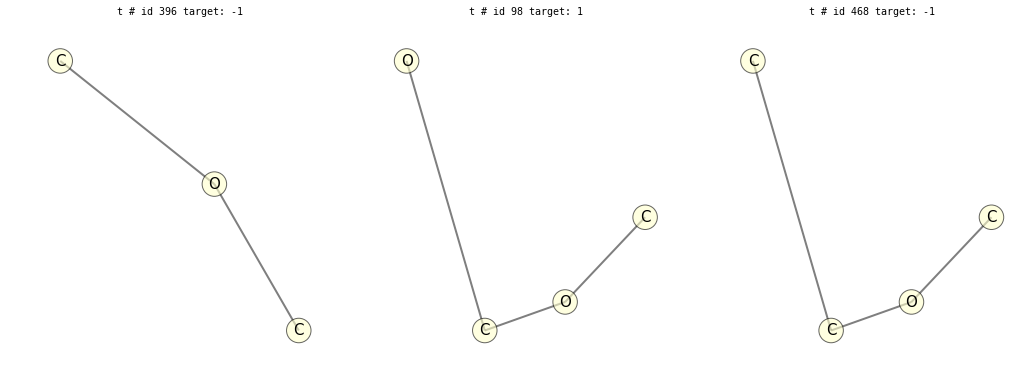

cluster: 15  len 3


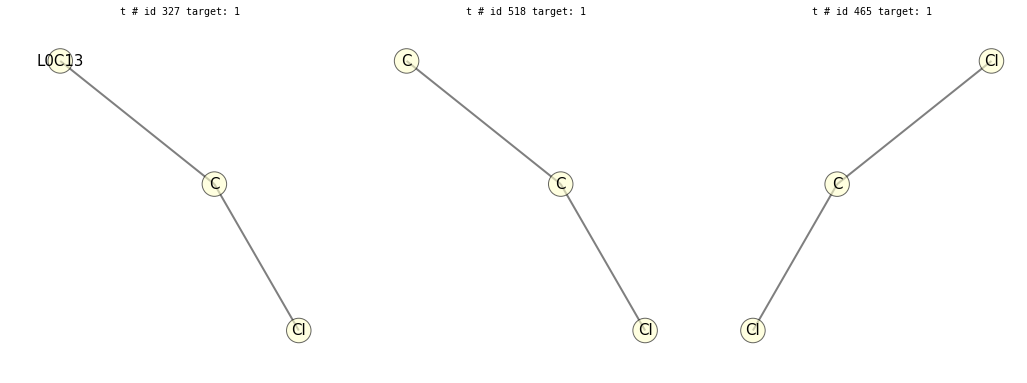

cluster: 16  len 2


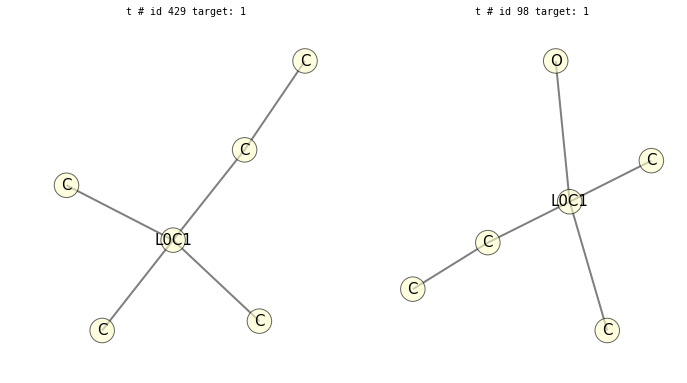

cluster: 17  len 2


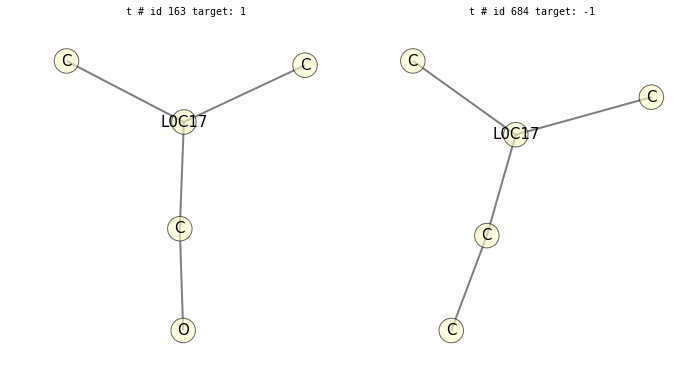

cluster: 18  len 2


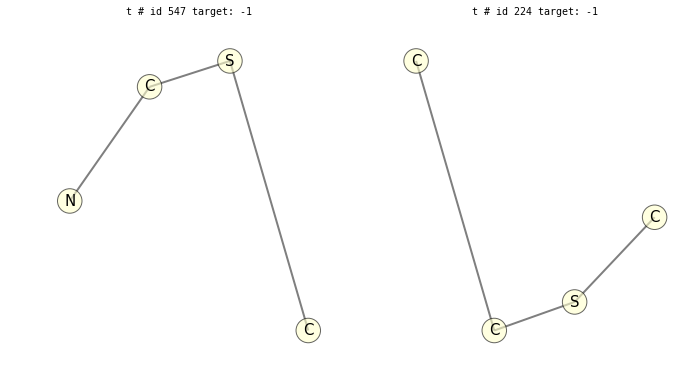

cluster: 19  len 2


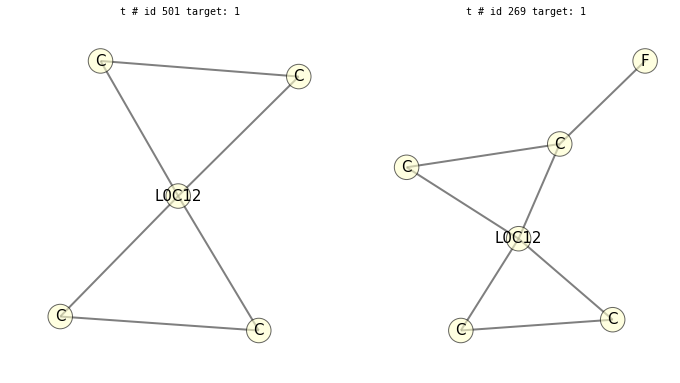

cluster: 20  len 2


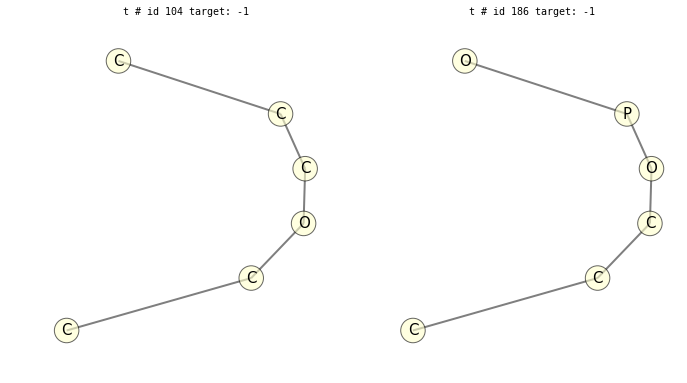

cluster: 21  len 2


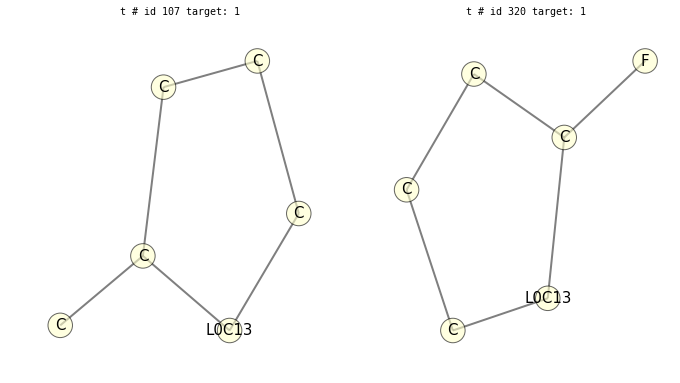

cluster: -1  len 132


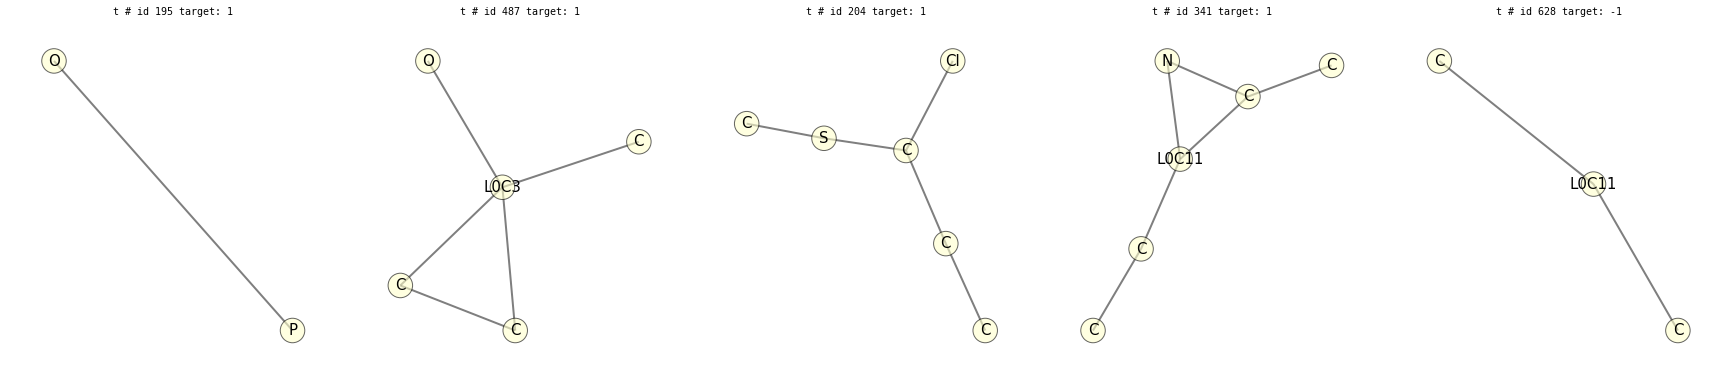

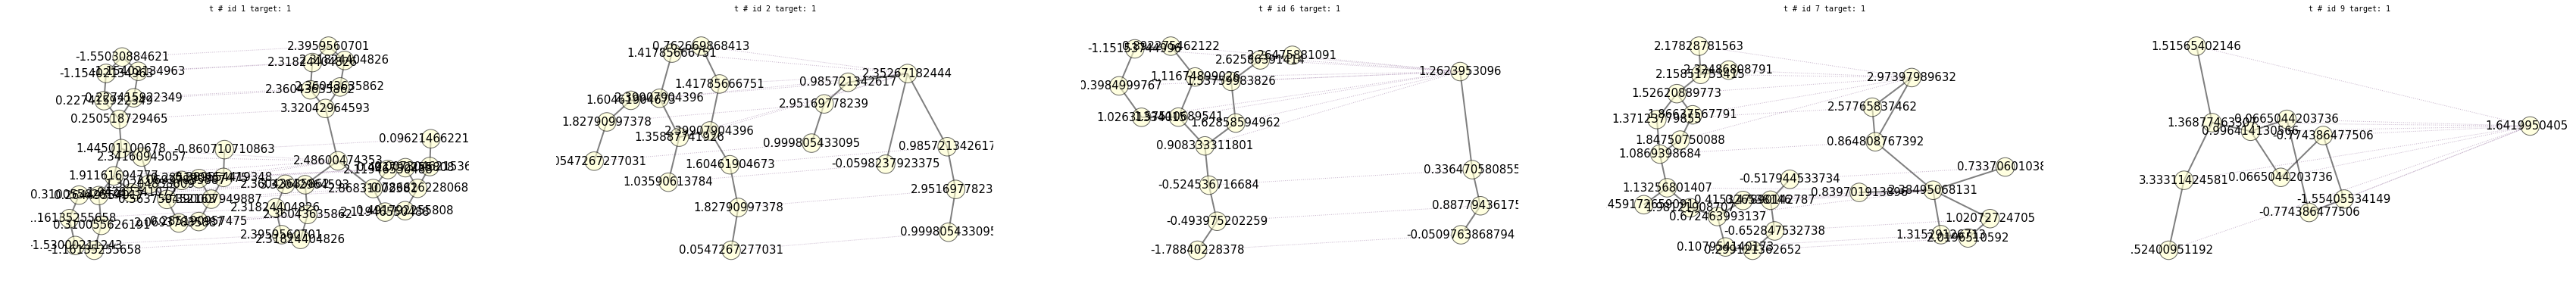

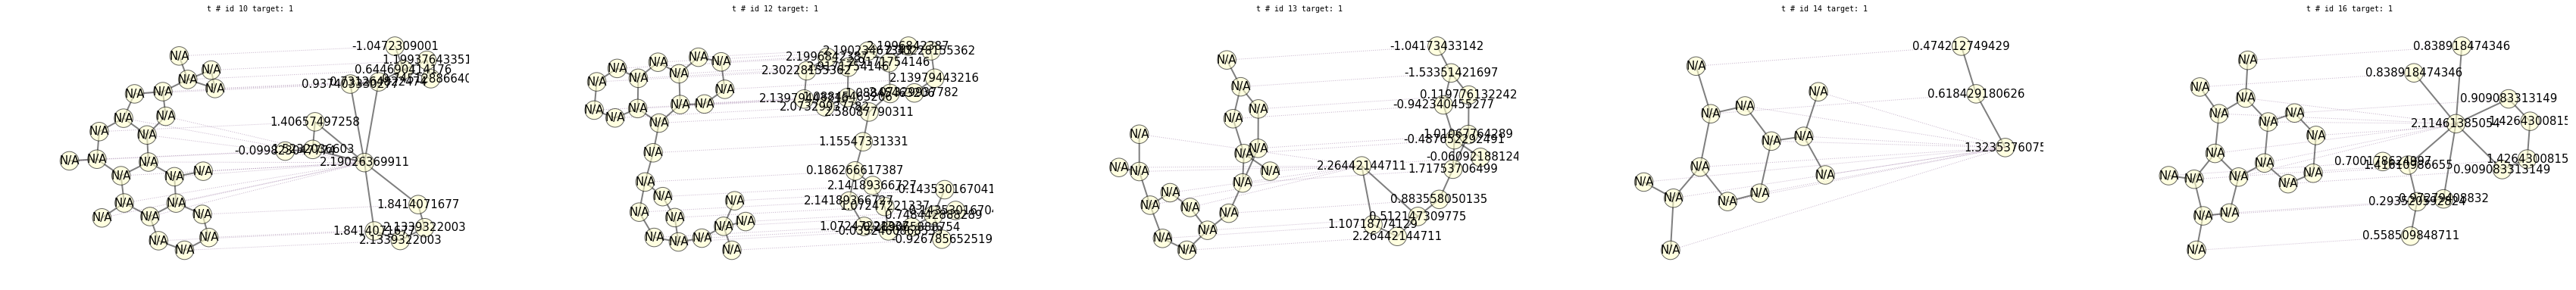

CPU times: user 1min 25s, sys: 2min 8s, total: 3min 33s
Wall time: 1min 14s


In [2]:
%%time
# Testing my evil plans 

import graphlearn01.learnedlayer.cascade as cascade
from graphlearn01.minor import decompose
from graphlearn01.utils import  draw

'''
graphs = get_graphs(size=200)
mycascade = cascade.Cascade(depth=2,debug=True,multiprocess=True,max_group_size=5,min_group_size=3, num_classes=1) 
graphs = mycascade.fit_transform(graphs)
draw.graphlearn_layered2(graphs[:5])
'''

for i in range(1):
    graphs = get_graphs(size=300)
    graphss = get_graphss(size=300)
    mycascade = cascade.Cascade(depth=2,debug=True,multiprocess=True,max_group_size=6,min_group_size=2, num_classes=2) 
    graphs = mycascade.fit_transform(graphs,graphss)
    
    for g in graphs[:10]:
        for n,d in g.nodes(data=True):
            d['importance_sd']=d['importance'][0]
    draw.graphlearn_layered2(graphs[:10],vertex_label='importance_sd')
    
    


[[1 0 2]
 [0 0 3]
 [4 5 6]]
[0 2 2 0 1 2]
[1 2 3 4 5 6]


TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
from graphlearn01.minor import decompose
from graphlearn01.utils import draw
decomp=decompose.MinorDecomposer()
mystuff = map(decomp.make_new_decomposer, graphs)
print len(mystuff)
mystuff = [ arg.compress_layers() for arg in mystuff]
print len(mystuff)
mystuff = [arg.pre_vectorizer_graph(nested=True) for arg in mystuff]
print len(mystuff)

#draw.graphlearn_layered(mystuff[:10])
#print 'asdasdasd'

### starts here

In [ ]:
%%time
#from graphlearn01.utils import draw
import graphlearn01.learnedlayer.cascade as cascade
graphs = list(get_graphs(size=200))
graphss = list(get_graphss(size=200))
mycascade = cascade.Cascade(depth=2,debug=False,multiprocess=True)

graph = mycascade.fit_transform(graphs,graphss)

#draw.graphlearn_layered2(graphs[:5])
#draw.graphlearn_layered2(g2[:5])


# ok was will ich von der cascade?
# transform muss noch laufen.. und zwar so dass unten graphs rausfallen.
#draw.graphlearn(graphs[:5])


-------------------------------